In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv("/Vishesh/MLOA/Exp2/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/Vishesh/MLOA/Exp2/input/digit-recognizer/test.csv")
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_X,train_y = train_df.iloc[:,1:].to_numpy(), train_df.iloc[:,[0]].to_numpy()
test_X,test_y = test_df.iloc[:,1:].to_numpy(), test_df.iloc[:,[0]].to_numpy()

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.fit_transform(test_X)

# Before PCA

In [5]:
print(f"Columns before PCA: {train_X.shape[1]}")

Columns before PCA: 784


In [6]:
# from sklearn.decomposition import PCA
# variance = []
# for i in range(1,780,100):
#     find_pca = PCA(n_components=i)
#     find_pca.fit(train_X)
#     print(f"Fitting to {find_pca.n_components}, {find_pca.explained_variance_ratio_[0]}")
#     variance.append(find_pca.explained_variance_ratio_[0])

[]

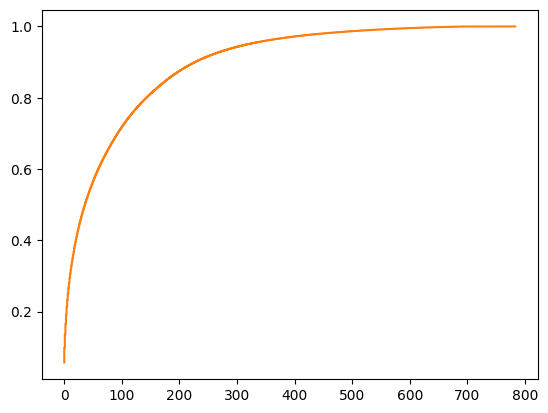

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
find_pca = PCA()
find_pca.fit(train_X)
exp_var_PCA = find_pca.explained_variance_ratio_
cumsum_exp_var = np.cumsum(exp_var_PCA)
plt.step(
    range(0, len(cumsum_exp_var)), 
    cumsum_exp_var, 
    label='Cumulative explained variance', 
    color='C1'
)
plt.plot()

In [8]:
best_components = np.argmax(cumsum_exp_var > 0.90)
best_components

228

In [9]:
best_pca = PCA(n_components=best_components)
train_X_pca = best_pca.fit_transform(train_X)
test_X_pca = best_pca.fit_transform(test_X)

In [10]:
print(f"Columns before PCA: {train_X.shape[1]}")
print(f"Columns after PCA: {train_X_pca.shape[1]}")

Columns before PCA: 784
Columns after PCA: 228


# Creating model

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'kernel':['linear', 'poly'],
              'degree':[1, 2,],
              'gamma': [0.01, 0.1],
              'coef0': [0.5, 1]}
grid_svm = GridSearchCV(estimator=SVC(probability = True),param_grid=param_grid,scoring='accuracy',verbose=3,return_train_score=True,cv=3,refit=True)
grid_svm.fit(train_X_pca,train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=1, gamma=0.01, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=1, gamma=0.01, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=1, gamma=0.01, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=1, gamma=0.01, kernel=poly;, score=(train=0.956, test=0.939) total time= 1.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=1, gamma=0.01, kernel=poly;, score=(train=0.956, test=0.938) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=1, gamma=0.01, kernel=poly;, score=(train=0.955, test=0.941) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=1, gamma=0.1, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=1, gamma=0.1, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=1, gamma=0.1, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=1, gamma=0.1, kernel=poly;, score=(train=0.967, test=0.931) total time= 1.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=1, gamma=0.1, kernel=poly;, score=(train=0.968, test=0.936) total time= 1.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=1, gamma=0.1, kernel=poly;, score=(train=0.964, test=0.935) total time= 1.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=2, gamma=0.01, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=2, gamma=0.01, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=2, gamma=0.01, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=2, gamma=0.01, kernel=poly;, score=(train=1.000, test=0.974) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=2, gamma=0.01, kernel=poly;, score=(train=0.999, test=0.974) total time= 1.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=2, gamma=0.01, kernel=poly;, score=(train=1.000, test=0.975) total time= 1.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=2, gamma=0.1, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=2, gamma=0.1, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=2, gamma=0.1, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=0.5, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.971) total time= 1.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=0.5, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.970) total time= 1.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=0.5, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.970) total time= 2.0min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=1, gamma=0.01, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=1, gamma=0.01, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=1, gamma=0.01, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=1, gamma=0.01, kernel=poly;, score=(train=0.956, test=0.939) total time= 1.4min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=1, gamma=0.01, kernel=poly;, score=(train=0.956, test=0.938) total time= 1.4min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=1, gamma=0.01, kernel=poly;, score=(train=0.955, test=0.941) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=1, gamma=0.1, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=1, gamma=0.1, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=1, gamma=0.1, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.8min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=1, gamma=0.1, kernel=poly;, score=(train=0.967, test=0.931) total time= 1.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=1, gamma=0.1, kernel=poly;, score=(train=0.968, test=0.937) total time= 1.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=1, gamma=0.1, kernel=poly;, score=(train=0.964, test=0.935) total time= 1.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=2, gamma=0.01, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=2, gamma=0.01, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=2, gamma=0.01, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=2, gamma=0.01, kernel=poly;, score=(train=1.000, test=0.973) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=2, gamma=0.01, kernel=poly;, score=(train=0.999, test=0.973) total time= 1.4min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=2, gamma=0.01, kernel=poly;, score=(train=1.000, test=0.973) total time= 1.5min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=2, gamma=0.1, kernel=linear;, score=(train=0.973, test=0.925) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=2, gamma=0.1, kernel=linear;, score=(train=0.974, test=0.929) total time= 3.6min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=2, gamma=0.1, kernel=linear;, score=(train=0.972, test=0.929) total time= 3.7min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/3] END coef0=1, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.972) total time= 1.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/3] END coef0=1, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.971) total time= 1.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/3] END coef0=1, degree=2, gamma=0.1, kernel=poly;, score=(train=1.000, test=0.970) total time= 1.9min


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'coef0': [0.5, 1], 'degree': [1, 2],
                         'gamma': [0.01, 0.1], 'kernel': ['linear', 'poly']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [12]:
grid_svm.best_params_,grid_svm.best_estimator_

({'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'},
 SVC(coef0=0.5, degree=2, gamma=0.01, kernel='poly', probability=True))

In [13]:
predictions_test = grid_svm.predict(test_X_pca)
predictions_train = grid_svm.predict(train_X_pca)

In [14]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(test_y,predictions_test))
accuracy_score(test_y,predictions_test)

              precision    recall  f1-score   support

           0       1.00      0.10      0.18     28000
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.10     28000
   macro avg       0.10      0.01      0.02     28000
weighted avg       1.00      0.10      0.18     28000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.097